# Bayesian Decision Theory

Design classifier to recommend decisions that minimize some total expected "risk".
- The simplest risk is the classification error
- Typically, the risk includes the cost associated with different decisions.

* Terminology: Assume we are to classify an object based on the evidence provided by feature vector $x$.
$$
\mathcal{X} = [{x}_1, {x}_2, ......, {x}_N]
$$
* Assign the apttern represented by the feature vector $x$ to the most probable of the available calsses
${\omega}_1, {\omega}_2, ......, {\omega}_c$

* That is $X\rightarrow \omega_i : P(\omega_i|x)$ is maximum. Computation of posterior probabilities assume known
* Prior probability: $$p(\omega_1), ....., p(\omega_c)$$
* where 
$$
P(\omega_i|x) = \frac{P(x|\omega_i)p(\omega_i)}{p(x)}
$$
$$
p(x) = \sum_{i=1}^{c}P(x|\omega_i)p(\omega_i)
$$

Bayesian decision rule for minimum error:
* Let's examine this rule for a 2-class problem
* Assumpltions: $p(\omega_1), p(\omega_2),p(x|\omega_1), p(x|\omega_2)$

Then we can write, if $p(\omega_1|x) > p(\omega_2|x)$ choose $\omega_1$ else choose $\omega_1$ 

Or, in a compact from
$$p(\omega_1|x) \gtrless p(\omega_2|x)$$

Applying Bayes rule
$$\frac{P(x|\omega_1)p(\omega_1)}{p(x)} \gtrless \frac{P(x|\omega_2)p(\omega_2)}{p(x)}$$

Since, $p(x)$ does not affect the decision rule, it can be eliminated
$$P(x|\omega_1)p(\omega_1) \gtrless P(x|\omega_2)p(\omega_2)$$

Or, in a more compact from
$$\Lambda(x) = \frac{P(x|\omega_1)}{P(x|\omega_2)} \gtrless \frac{p(\omega_2)}{p(\omega_1)}$$

The term $\Lambda(x)$ is called the likelihood ration, and the decision rule is known as the likelihood ration test $\textbf{(LRT)}$. An Example:

Problem: Given the likelihood below, derive a decision rule based on the LRT (assume equal priors).
$$p(x|\omega_1) = N(4,1);\;\; p(x|\omega_2)= N(10,1)$$

$$\Lambda(x) = \frac{\frac{1}{\sqrt{2\pi}}\exp(-\frac{(x-\mu_1)^2)}{2\sigma^2})}{\frac{1}{\sqrt{2\pi}}\exp(-\frac{x-\mu_2}{2\sigma^2})} \gtrless \frac{1}{1}$$

$$\Lambda(x) = \frac{\frac{1}{\sqrt{2\pi}}\exp(-\frac{1}{2(1)^2}(x-4)^2)}{\frac{1}{\sqrt{2\pi}}\exp(-\frac{1}{2(1)^2}(x-10)^2)} \gtrless \frac{1}{1}$$

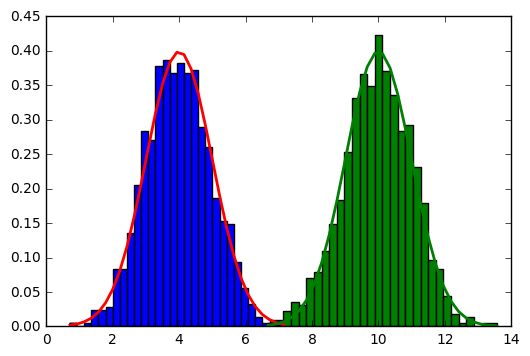

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

mu1, sigma1 = 4, 1  # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, 1000)
count1, bins1, ignored1 = plt.hist(s1, 30, normed=True)
plt.plot(
    bins1,
    1 / (sigma1 * np.sqrt(2 * np.pi)) * np.exp(-(bins1 - mu1)**2 /
                                               (2 * sigma1**2)),
    linewidth=2,
    color='r')

mu2, sigma2 = 10, 1  # mean and standard deviation
s2 = np.random.normal(mu2, sigma2, 1000)
count2, bins2, ignored2 = plt.hist(s2, 30, normed=True)
plt.plot(
    bins2,
    1 / (sigma2 * np.sqrt(2 * np.pi)) * np.exp(-(bins2 - mu2)**2 /
                                               (2 * sigma2**2)),
    linewidth=2,
    color='g')

$$\Lambda(x) = \exp(-\frac{1}{2}(x-4)^2+\frac{1}{2}(x-10)^2) \gtrless 1$$

By changing signs and taking logs:

$$-\frac{1}{2}(x-4)^2+\frac{1}{2}(x-10)^2 \gtrless 0$$

$$-\frac{1}{2}[(x-4)^2-(x-10)^2] \gtrless 0$$

$$(x-4)^2-(x-10)^2 \lessgtr 0$$

$$x^2-8x+16-x^2+20x-100 \lessgtr 0$$

$$x-7 \lessgtr 0$$

$$x \lessgtr 7$$
So, choose $\omega_1$ if $x$ is less than $7$ else choose $\omega_2$

$\textbf{The discriminent function from of likelihood ratio:}$

$$\Lambda(x) = \frac{P(x|\omega_1)}{P(x|\omega_2)} \gtrless \frac{p(\omega_2)}{p(\omega_1)}$$

$$h(x) = -\ln(x)=-ln(P(x|\omega_1))+ln(P(x|\omega_2)) \lessgtr \ln\frac{p(\omega_1)}{p(\omega_2)}$$

The probability of Bayes error:
$$
P(error|x) = 
\begin{cases}
P(\omega_1|x),\; \textrm{if we decide $\omega_2$} \\
P(\omega_2|x),\; \textrm{if we decide $\omega_1$}
\end{cases}$$

Or, in other term
$$P(error|x) = min[P(\omega_1|x), P(\omega_2|x)]$$

Total error:
$$
P(error) = E\Big[P(error|x)\Big]\\
=\int_{}^{} P(error|x)p(x) dx \\
=\int_{}^{} min[P(\omega_1|x), P(\omega_2|x)] [p(\omega_1)P(x|\omega_1)+p(\omega_2)P(x|\omega_2)] dx \\
=\int_{R_1}^{} P(\omega_2|x)p(x) dx + \int_{R_2}^{} P(\omega_1|x)p(x) dx \\
=p(\omega_2)\int_{R_1}^{} P(x|\omega_2)dx + p(\omega_1)\int_{R_2}^{} P(x|\omega_1)dx\\
=p(\omega_2)\epsilon_2 + p(\omega_1)\epsilon_1
$$

For any given problem, the minimum probability of error is achived by the LRT decision rule; the probability of error is called the Bayes error rate and is the best any classifier can do.

$\textbf{Bayes Risk:}$ We define the Bayes risk as the expected value of the cost

$$
\Re = E\big[C\big] \\
=\sum_{i=1}^{2}\sum_{j=1}^{2} C_{ij} P(choose\; \omega_i \;and\; x\in\omega_j)\\
=\sum_{i=1}^{2}\sum_{j=1}^{2} C_{ij} P(x\in R_i|\omega_j) p(\omega_j)
$$

First notice that 
$$
P(x\in R_i|\omega_j) = \int_{R_i}^{}p(x|\omega_j)dx
$$

We can express the Bayes risk as 
$$
\Re =\int_{R_1}^{} \big[C_{11}p(\omega_1)P(x|\omega_1)+C_{12}p(\omega_2)P(x|\omega_2)\big]dx +\\
\int_{R_2}^{} \big[C_{21}p(\omega_1)P(x|\omega_1)+C_{22}p(\omega_2)P(x|\omega_2)\big]dx
$$

One can also write
$$
\int_{R_1}^{} P(x|\omega_i)dx + \int_{R_2}{}P(x|\omega_i)dx =  
\int_{R_1\cup R_2}^{} P(x|\omega_i)dx = 1
$$

A typical loss matrix for the two class problem would have the form

$$
C=
  \begin{bmatrix}
    0 & C_{12} \\
    C_{21} & 0
  \end{bmatrix}
$$

Merging the last two equation into the Bayes risk expression and canceling out the integrals over $R_2$ yields

$$
\Re =C_{21}p(\omega_1) + C_{22}p(\omega_2) + \\ (C_{12}-C_{22})p(\omega_2) \int_{R_1}^{}P(x|\omega_2)dx -
(C_{21}-C_{11})p(\omega_1) \int_{R_1}^{}P(x|\omega_1)dx
$$
The first two terms are constant w.r.t. $R_1$. Thus, we seek a decision region $R_1$ that minimizes 

$$
R_1 = argmin \int_{R_1}^{} \big[ (C_{12}-C_{22})p(\omega_2) P(x|\omega_2) -
(C_{21}-C_{11})p(\omega_1)P(x|\omega_1) \big]dx \\
=argmin \int_{R_1}^{}g(x)
$$

Intuitively, we select for $R_1$ regions that minimize $\int_{R_1}^{}g(x)$. In other words, those regions where $g(x)<0$. So we will choose $R_1$ such that

$$
(C_{21}-C_{11})p(\omega_1) P(x|\omega_1) \gtrless (C_{12}-C_{22})p(\omega_2)P(x|\omega_2) \\ 
\frac{P(x|\omega_1)}{P(x|\omega_2)} \gtrless \frac{C_{12}-C_{22})p(\omega_2)}{C_{21}-C_{11})p(\omega_21)}
$$

Therefore, minimization of the Bayes risk also leads to an LRT. For axample, concider a problem with likelihood



$$R_1 = N(0,\sqrt{3});\;\; R_2= N(2,1)$$

Assume $p(\omega_1) = p(\omega_2)$ and $C_{ii}=0$, $C_{12}=1$, and $C_{21}=\sqrt{3}$

$$\Lambda(x) = \frac{N(0,\sqrt{3})}{N(2,1)} \gtrless \frac{1}{\sqrt{3}}$$

$$-\frac{1}{2}\frac{x^2}{3}+\frac{1}{2}(x-2)^2 \gtrless 0$$

$$2x^2 - 12x + 12 \gtrless 0$$

$$x = 4.73\;, 1.27$$

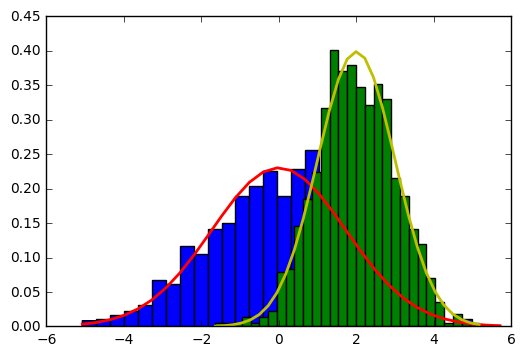

In [4]:
mu1, sigma1 = 0, 1.732  # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, 1000)
count1, bins1, ignored1 = plt.hist(s1, 30, normed=True)
plt.plot(
    bins1,
    1 / (sigma1 * np.sqrt(2 * np.pi)) * np.exp(-(bins1 - mu1)**2 /
                                               (2 * sigma1**2)),
    linewidth=2,
    color='r')

mu2, sigma2 = 2, 1  # mean and standard deviation
s2 = np.random.normal(mu2, sigma2, 1000)
count2, bins2, ignored2 = plt.hist(s2, 30, normed=True)
plt.plot(
    bins2,
    1 / (sigma2 * np.sqrt(2 * np.pi)) * np.exp(-(bins2 - mu2)**2 /
                                               (2 * sigma2**2)),
    linewidth=2,
    color='y')

$\textbf{LRT variations:}$
* Bayes criterion: This is the LRT that minimizes the Bayes rick

$$\Lambda_{Bayes}(x) = \frac{P(x|\omega_1)}{P(x|\omega_2)} \gtrless \frac{C_{12}-C_{22})p(\omega_2)}{C_{21}-C_{11})p(\omega_21)}$$

* Maximum A Posteriori criterion: sometime we may be interested in minimizing $P(error)$: A special case of $\Lambda(x)$ that uses a zero-one cost 

$$
C_{ij}= 
\begin{cases}
0,\; \textrm{if i = j} \\
1,\; \textrm{otherwise}
\end{cases}
$$

* Maximum likelihood criterion: for equal priors $p(\omega_i)=\frac{1}{2}$ and $0/1$ loss function, the LRT is known as a ML criterion, since it seeks to maximize $P(x|\omega_i)$
$$\Lambda_{ML}(x) = \frac{P(x|\omega_1)}{P(x|\omega_2)} \gtrless 1$$

$\textbf{Bayes decision rule for multiclass problems:}$
* For a C class: $p(\omega_1), ....., p(\omega_c)$
* Assumption: prior and likelihood is given
$$
\begin{cases}
p(\omega_i),\; \textrm{prior} \\
P(x|\omega_i),\; \textrm{likelihood}
\end{cases}
$$
* Minimum $P(error)$ for multiclass problems 
$$
P(error) = 1 - P(correct) \\
where,\;\; P(correct) = \sum_{i=1}^{C} p(\omega_i)\int_{R_i}{}p(x|\omega_i)dx
$$
* minimizing $P(error)$ is equivalent to maximizing $P(correct)$. So expressing the previous term as 
$$
P(correct) = \sum_{i=1}^{C} \int_{R_i}{}p(x)p(\omega_i|x)dx
$$

Minimum Bayes risk for multi-class problems:
* we denote by $\alpha_i$ the decision to choose class $\omega_i$ 
* we denote by $\alpha(x)$ the overall decision rule that maps feature vector $x$ into classes $\omega_i$, $\alpha(x)\rightarrow \{\alpha_1, ....., \alpha_c\}$
* The condition risk $\Re(\alpha_i|x)$ of assigning $x$ to class $\omega_i$ is
$$
\Re(\alpha(x)\rightarrow \alpha_i) = \Re(\alpha_i|x) = \sum_{j=1}^{C} C_{ij}P(\omega_i|x)
$$
* and the Bayes risk associated with decision rule $\alpha(x)$ is
$$
\Re(\alpha(x)) = \int_{}{} \Re(\alpha(x)|x)p(x)dx
$$

#Discriminant Function

* At each point $x$ in feature space, choose class $\omega_i$ that maximizes (or minimizes) some measure $g_i(x)$.
* A useful way to represent classification is through a set of discriminant function $g_i(x),\; i=1, ..., C$, where a feature vector $x$ is assigned to class $\omega_i$ if:
$$
g_i(x) > g_j(x) \;\; \forall j\neq i
$$
* The three decision rules for Bayes classifier can be summarize as
    1. $g_i(x) = -\Re(\alpha_i|x)$ - general loss function
    2. $g_i(x) = P(\omega_i|x)$ - zero-one loss function
    3. $g_i(x) = P(x|\omega_i)$ - zero-one loss function

In order to simplyfy the calculation of $g_i(x)$, we can replease $g_i(x)$ with $f(g_i(x))$, where $f(\cdot)$ is monotonically increasing, which does not change the classification results. Let,
$$
g_i(x) = P(\omega_i|x) \\
g_i(x) = \frac{P(x|\omega_i)p(\omega_i)}{p(x)} \\
g_i(x) = P(x|\omega_i)p(\omega_i) \\
\ln(g_i(x)) = \ln(P(x|\omega_i)) + \ln(p(\omega_i))
$$

More common to use a single discriminant function instead of two:
$$
g(x) = g_1(x) - g_2(x)
$$
* decide $\omega_1$ if $g(x)>0$; otherwise decide $\omega_2$ 

we can also express it in LRT form:
$$p(\omega_1|x) \gtrless p(\omega_2|x)$$

$$\frac{P(x|\omega_1)p(\omega_1)}{p(x)} \gtrless \frac{P(x|\omega_2)p(\omega_2)}{p(x)}$$

$$P(x|\omega_1)p(\omega_1) \gtrless P(x|\omega_2)p(\omega_2)$$

$$g(x) = \frac{P(x|\omega_1)}{P(x|\omega_2)} \gtrless \frac{p(\omega_2)}{p(\omega_1)}$$

$$\ln(g(x)) = \ln \frac{P(x|\omega_1)}{P(x|\omega_2)} \gtrless \ln \frac{p(\omega_2)}{p(\omega_1)}$$

$$g(x) = \ln \frac{P(x|\omega_1)}{P(x|\omega_2)} + \ln \frac{p(\omega_1)}{p(\omega_2)}$$

Decision rules devides the feature space in decision regions $R_1, ......., R_c$ separated by decision boundaries. Bayes classifier for normally distributed classes.
* The multivariate normal pdf is
$$
f_X(x) = (2\pi)^{-\frac{N}{2}} |\Sigma|^{-\frac{1}{2}} \exp[-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)]
$$
* Using Bayes rule, the discriminant function becomes
$$
g_i(x) = P(\omega_i|x) = \frac{P(x|\omega_i)p(\omega_i)}{p(x)} \\
g_i(x) = \frac{ (2\pi)^{-\frac{N}{2}} |\Sigma|^{-\frac{1}{2}} \exp[-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)]p(\omega_i)}{p(x)}
$$
* By eliminating constant terms
$$
g_i(x) = (2\pi)^{-\frac{N}{2}} |\Sigma|^{-\frac{1}{2}} \exp[-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)]p(\omega_i)
$$
* And taking natural logs ($\ln$)
$$
g_i(x) = -\frac{1}{2}(x-\mu_i)^T\Sigma_{i}^{-1}(x-\mu_i) - \frac{1}{2}\ln(|\Sigma_i|) + \ln(p(\omega_i))
$$

* This expression is called a $\textbf{quadratic discriminant function}$.

## Multivariate Gaussian Density

$\textbf{Case I:}\;\;\Sigma_i=\sigma^2I$
* This situation occurs when features are statistically independent with equal variance for all classes
* In this case, the quadratic $DF_s$ become
$$
g_i(x) = -\frac{1}{2}(x-\mu_i)^T(\sigma^2I)^{-1}(x-\mu_i) - \frac{1}{2}\ln(|\sigma^2I|) + \ln(p(\omega_i)) - \frac{N}{2}ln(2\pi)
$$

* If we disregrad $\frac{N}{2}ln(2\pi)$ and $\frac{1}{2}\ln(|\sigma^2I|)$ (constant)
$$
g_i(x) = -\frac{1}{2}(x-\mu_i)^T(\sigma^2I)^{-1}(x-\mu_i) + \ln(p(\omega_i))
$$

* Expending this expression
$$
g_i(x) = -\frac{1}{2\sigma^2}(x^Tx - 2\mu_{i}^{T}x + \mu_{i}^{T}\mu_i) + \ln(p(\omega_i))
$$

* Eliminating the term $x^Tx$, which is constant for all classes
$$
g_i(x) = -\frac{1}{2\sigma^2}(- 2\mu_{i}^{T}x + \mu_{i}^{T}\mu_i) + \ln(p(\omega_i))
$$

* We get a $\textbf{linear discriminant}$
$$
g_i(x) = W_{i}^TX + w_{i0}\\
$$
    where $w_i = \frac{1}{2\sigma^2}$ and $w_{io} = -\frac{1}{2\sigma^2}(\mu_{i}^{T}\mu_i)+ \ln(p(\omega_i))\\$

* Decision boundary is dertermined by hyperlanes: setting
$$
g_i(x) = g_j(x)\\
W^T(x-x_0) = 0\\
$$
    where $w=\mu_i\mu_j$ and $x_0=\frac{1}{2}(\mu_i+\mu_j)-\frac{\sigma^2}{||\mu_i-\mu_j||^2}ln\frac{p(\omega_i}{p(\omega_j)}(\mu_i-\mu_j)$.

$\textbf{Properties of decision doundary:}$
* It passes through $x_0$
* It is orthogonal to the line linking the means
* If $p(\omega_i)\neq p(\omega_j)$, then $x_0$ shifts away from the most likely category
* If $\sigma$ is very small, the position of the boundary is insensitive to $p(\omega_i)\;\;and\;\; p(\omega_j)$
* If we assume equal priors, then $g_i(x) = -\frac{1}{2\sigma^2}(x-\mu_i)^T(x-\mu_i)$
    1. Is called the minimum-distance classifier
    2. The equiprobable contours are hyper-spheres
    3. For unit variance $(\sigma^2=1)$, $g_i(x)$ is the Euclidean distance.

    

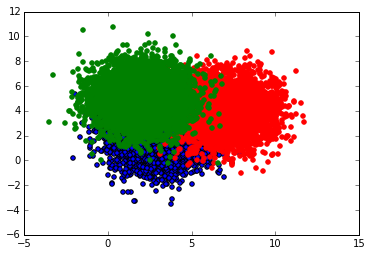

In [7]:
mean = [3,2]
cov = [[2, 0],[0,2]] # diagonal covariance, points lie on x or y-axis
x,y = np.random.multivariate_normal(mean, cov, 5000).T
plt.scatter(x,y)
mean = [7,4]
cov = [[2, 0],[0,2]] # diagonal covariance, points lie on x or y-axis
x,y = np.random.multivariate_normal(mean, cov, 5000).T
plt.scatter(x,y,color='r')
mean = [2,5]
cov = [[2, 0],[0,2]] # diagonal covariance, points lie on x or y-axis
x,y = np.random.multivariate_normal(mean, cov, 5000).T
plt.scatter(x,y,color='g')

$\textbf{Case II:}\;\;\Sigma_i=\Sigma$ (diagonal)
* Classes still have the same covariance, but feature are allowed to have different variance
$$
g_i(x) = -\frac{1}{2}(x-\mu_i)^T(\Sigma)^{-1}(x-\mu_i) - \frac{1}{2}\ln(|\Sigma|) + \ln(p(\omega_i)) - \frac{N}{2}ln(2\pi)\\
$$

* If we disregrad $\frac{N}{2}ln(2\pi)$ (constant)
$$
g_i(x) = -\frac{1}{2}\sum_{k=1}^{N} \frac{(x_k-\mu_{i,k})^2}{\sigma_k^2} - \frac{1}{2} \ln\prod_{k=1}^{N}\sigma_k^2 + \ln p(\omega_i)\\
$$

* Eliminating the term $x_k^2$, which is constant for all classes
$$
g_i(x) = -\frac{1}{2}\sum_{k=1}^{N} \frac{-2x_k\mu_{i,k}+\mu_{i,k}^2}{\sigma_k^2} - \frac{1}{2} \ln\prod_{k=1}^{N}\sigma_k^2 + \ln p(\omega_i)\\
$$

* This discriminant is also linear, so the decision boundaries $g_i(x) = g_j(x)$ will also be hyper-planes
* The equiprobable contours are hyper-ellipses aligned with the reference frame
* Note that the only difference with the previous classifier is that the distance of the axis is normalized by its variance. 


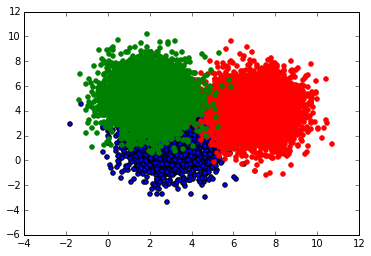

In [8]:
mean = [3,2]
cov = [[1, 0],[0,2]] # diagonal covariance, points lie on x or y-axis
x,y = np.random.multivariate_normal(mean, cov, 5000).T
plt.scatter(x,y)
mean = [7,4]
cov = [[1, 0],[0,2]] # diagonal covariance, points lie on x or y-axis
x,y = np.random.multivariate_normal(mean, cov, 5000).T
plt.scatter(x,y,color='r')
mean = [2,5]
cov = [[1, 0],[0,2]] # diagonal covariance, points lie on x or y-axis
x,y = np.random.multivariate_normal(mean, cov, 5000).T
plt.scatter(x,y,color='g')

$\textbf{Case III:}\;\;\Sigma_i=\Sigma$ (non-diagonal)
* The classes have equal covariance matrix, but no longer diagonal
$$
g_i(x) = -\frac{1}{2}(x-\mu_i)^T \Sigma^{-1}(x-\mu_i) - \frac{1}{2}\ln(|\Sigma|) + \ln(p(\omega_i)) - \frac{N}{2}ln(2\pi)\\
$$

* If we disregrad $\frac{N}{2}ln(2\pi)$ and $\frac{1}{2}\ln(|\sigma^2I|)$, which are constant for all classes, and assuming equal priors
$$
g_i(x) = -\frac{1}{2}(x-\mu_i)^T(\Sigma^{-1})(x-\mu_i)\\
$$
* This quadratic term is called the $\textbf{Mahalanobis distance}$
* The Mahalanobis distance is vector distance that uses a $\Sigma^{-1}$ norm, $\Sigma^{-1}$ acts as a stretching factors on the space. 
* Expending the quadratic term
$$
g_i(x) = -\frac{1}{2}(x^T\Sigma^{-1}x - 2\mu_{i}^{T}\Sigma^{-1}x + \mu_{i}^{T}\Sigma^{-1}\mu_i)
$$

* Eliminating the term $x^T\Sigma^{-1}x$, which is constant for all classes
$$
g_i(x) = -\frac{1}{2}(-2\mu_i^T\Sigma^{-1}x + \mu_i^T\Sigma^{-1}\mu_i) = W_{1}^TX + w_{0}\\
$$
* So, the $DF_s$ are still linear
* Is called the minimum-distance classifier
* Note that when $\Sigma=I$, the Mahalanobis distance becomes the familiar Euclidean distance.

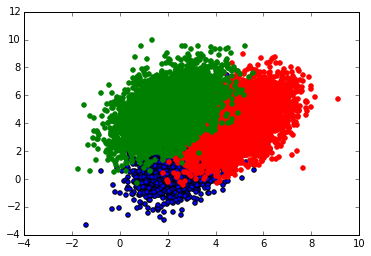

In [9]:
mean = [3,2]
cov = [[1, .7],[.7,2]] # diagonal covariance, points lie on x or y-axis
x,y = np.random.multivariate_normal(mean, cov, 5000).T
plt.scatter(x,y)
mean = [5,4]
cov = [[1, .7],[.7,2]] # diagonal covariance, points lie on x or y-axis
x,y = np.random.multivariate_normal(mean, cov, 5000).T
plt.scatter(x,y,color='r')
mean = [2,5]
cov = [[1, .7],[.7,2]] # diagonal covariance, points lie on x or y-axis
x,y = np.random.multivariate_normal(mean, cov, 5000).T
plt.scatter(x,y,color='g')

$\textbf{Case IV:}\;\;\Sigma_i = \sigma_iI$
* The classes have equal covariance matrix, but no longer diagonal
$$
g_i(x) = -\frac{1}{2}(x-\mu_i)^T \sigma^{-2}(x-\mu_i) + \ln p(\omega_i) - \frac{N}{2}ln(|\sigma_i^2|)\\
$$

* This expression cannot be reduced further
* The decision boudary is quadratic
* The equiprobable contours are hyper-spheres aligned with the feature axis

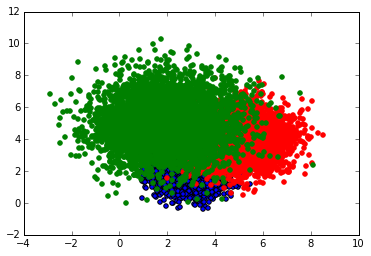

In [10]:
mean = [3,2]
cov = [[.5, 0],[0,.5]] # diagonal covariance, points lie on x or y-axis
x,y = np.random.multivariate_normal(mean, cov, 5000).T
plt.scatter(x,y)
mean = [5,4]
cov = [[1, 0],[0,1]] # diagonal covariance, points lie on x or y-axis
x,y = np.random.multivariate_normal(mean, cov, 5000).T
plt.scatter(x,y,color='r')
mean = [2,5]
cov = [[2, 0],[0,2]] # diagonal covariance, points lie on x or y-axis
x,y = np.random.multivariate_normal(mean, cov, 5000).T
plt.scatter(x,y,color='g')

$\textbf{Case V:}\;\;\Sigma_i \neq \Sigma_j$
* The expression for the general case
$$
g_i(x) = -\frac{1}{2}(x-\mu_i)^T \Sigma^{-1}(x-\mu_i) - \frac{1}{2}\ln(|\Sigma_i|) + \ln(p(\omega_i))\\
$$

* Reorganizing terms in a quadratic form yields
$$
g_i(x) =  X^TW_{2,i}X + W_{1,i}^{T}X + W_{0,i}\\
$$
    where $$
\begin{cases}
W_{2,i} = -\frac{1}{2}\Sigma_i^{-1}\\
W_{1,i} = \Sigma_i^{-1}\mu_i\\
W_{0,i} =  -\frac{1}{2}\mu_i^T\Sigma_i^{-1}\mu_i - \frac{1}{2}\ln(|\Sigma_i|) + \ln p(\omega_i)
\end{cases}\\
$$

* The equiprobable contours are hyper-ellipses oriented with the eigenvectors of $\Sigma_i$ for that classes.

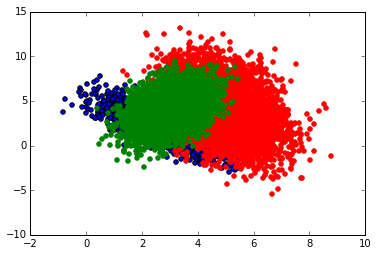

In [18]:
mean = [3,2]
cov = [[1, -1],[-1,2]] # diagonal covariance, points lie on x or y-axis
x,y = np.random.multivariate_normal(mean, cov, 5000).T
plt.scatter(x,y)
mean = [5,4]
cov = [[1, -1],[-1,7]] # diagonal covariance, points lie on x or y-axis
x,y = np.random.multivariate_normal(mean, cov, 5000).T
plt.scatter(x,y,color='r')
mean = [3,4]
cov = [[.5, .5],[.5,3]] # diagonal covariance, points lie on x or y-axis
x,y = np.random.multivariate_normal(mean, cov, 5000).T
plt.scatter(x,y,color='g')

#Numerical example

Drive a linear DF for the following 2-class 3D problem
    $\mu_1=[0, 0, 0];\;\;\mu_2=[2, 2, 2];\;\;\Sigma_1=\Sigma_2=
  \begin{bmatrix}
    .25 & 0 & 0 \\
    0 & .25 & 0 \\
    0 & 0 & .25
  \end{bmatrix};\;\; p(\omega_2)=2p(\omega_1)\\$

Solution

$$
g_1(x) = -\frac{1}{2\sigma^2I}(x-\mu_i)^T(x-\mu_i) + \ln(p(\omega_i))\\
$$

$$
= -\frac{1}{2}\begin{bmatrix}
    x-0 \\
    y-0 \\
    z-0 \\
  \end{bmatrix} 
  \begin{bmatrix}
    4 & 0 & 0 \\
    0 & 4 & 0 \\
    0 & 0 & 4 \\
  \end{bmatrix}
  \begin{bmatrix}
    x-0 \\
    y-0 \\
    z-0 \\
  \end{bmatrix} + \ln(\frac{1}{3})\\
$$
$$
g_2(x) = -\frac{1}{2}\begin{bmatrix}
    x-1 \\
    y-1 \\
    z-1 \\
  \end{bmatrix} 
  \begin{bmatrix}
    4 & 0 & 0 \\
    0 & 4 & 0 \\
    0 & 0 & 4 \\
  \end{bmatrix}
  \begin{bmatrix}
    x-1 \\
    y-1 \\
    z-1 \\
  \end{bmatrix} + \ln(\frac{2}{3})\\
$$
$$
g_1(x) \gtrless g_2(x)\\
$$
$$
-2(x^2+y^2+z^2) + \ln(\frac{1}{3}) \gtrless -2[(x-1)^2+(y-1)^2+(z-1)^2 + \ln(\frac{2}{3})\\
$$
$$
x+y+z \gtrless \frac{6-ln 2}{4} = 1.32\\
$$

Classify the test example, $x_t = [.1, .7, . 8]$
$$
.1 + .7 + .8 = 1.6 \gtrless 1.32 \\
$$

$\therefore x_t \in \omega_2$

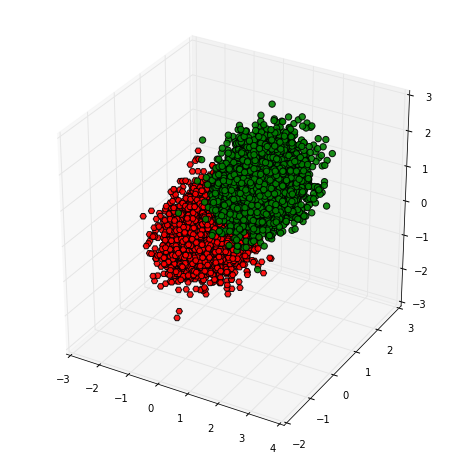

In [8]:
from mpl_toolkits.mplot3d import Axes3D

mu1 = [0,0,0]
mu2 = [1,1,1]
cov = [[.25,0,0],[0,.25,0],[0,0,.25]]
x1,y1,z1 = np.random.multivariate_normal(mu1, cov, 5000).T
x2,y2,z2 = np.random.multivariate_normal(mu2, cov, 5000).T

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1, c='red', marker='H', s=40, alpha=0.9)
ax.scatter(x2, y2, z2, c='green', marker='o', s=40, alpha=0.9)

#Conclusion

1. The Bayes classifier for Gaussian classes is quadratic
2. The Bayes classifier for Gaussian classes with equal covariance is linear
3. The Mahalanobis distance classifier is Bayes-optimal
    1. normally distributed classes
    2. equal covariance matrices
    3. equal priors
4. The Euclidean distance classifier is Bayes-optimal for
    1. normally distributed classes
    2. equal covariance matrices proportional to the identity matrix
    3. equal priors
5. Both Euclidean and Mahalanobis distance classifier are linear classifier

# Linear and Quadratic Discriminant Function Code

<class 'numpy.ndarray'>


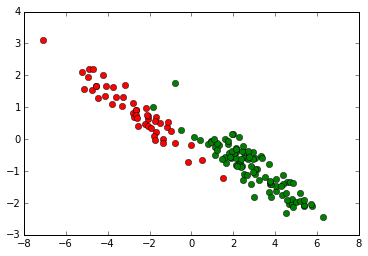

In [4]:
data = np.loadtxt('./Data/classificationA.train', delimiter="\t")

class1 = data[data[:,2] == 0][:,(0,1)]
class2 = data[data[:,2] == 1][:,(0,1)]
print(type(class1))
plt.plot(class1[:,0], class1[:,1], 'go', class2[:,0], class2[:,1], 'ro')

In [7]:
#Estimate the parameters of our model
sigma = class1.T.dot(class1)/len(class1)
mean1 = class1.mean(0)
mean2 = class2.mean(0)
p1 = len(class1)/float(len(data))
p2 = 1-p1

In [8]:
sigma

array([[ 10.71896757,  -3.63945951],
       [ -3.63945951,   1.37479476]])

In [9]:
#Create a meshgrid to plot the bayesian separator
x = np.linspace(-15,15,200)
y = np.linspace(-15,15,200)
X0,Y0 = np.meshgrid(x, y)

In [10]:
#Get the slope and intercept of the decision boundary (log(P(y=1|x)) = log(0.5))
def lda_train(x1,x2):
    mean1 = x1.mean(0)
    mean2 = x2.mean(0)
    sigma = (x1-mean1).T.dot(x1-mean1)/len(x1)
    inv_sigma = np.linalg.inv(sigma)
    beta_lda = inv_sigma.dot(mean1 - mean2)
    alpha_lda = 0.5*(mean2.T.dot(inv_sigma.dot(mean2)) - mean1.T.dot(inv_sigma.dot(mean1))) + np.log(p1/p2)
    return beta_lda, alpha_lda

beta_lda, alpha_lda = lda_train(class2,class1)

<a list of 3 text.Text objects>

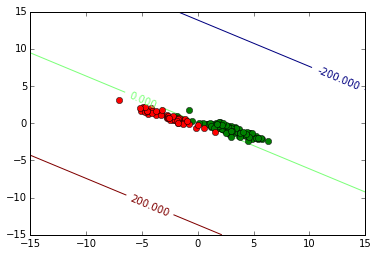

In [11]:
# The decision function values on the meshgrid
Z0 = X0*beta_lda[0] + Y0*beta_lda[1] + alpha_lda
plt.plot(class1[:,0], class1[:,1], 'go', class2[:,0], class2[:,1], 'ro')
cs = plt.contour(X0,Y0,Z0,3)
plt.clabel(cs)

In [17]:
# This function trains a QDA model
def qda_train(class1, class2,p1):
    mean1 = class1.mean(0)
    mean2 = class2.mean(0)
    sigma1 = (class1-mean1).T.dot(class1-mean1)/len(class1)
    sigma2 = (class2-mean2).T.dot(class2-mean2)/len(class2)
    sigma1_inv = np.linalg.inv(sigma1)
    sigma2_inv = np.linalg.inv(sigma2)
    A = 0.5*(sigma2_inv - sigma1_inv)
    B = mean1.T.dot(sigma1_inv) - mean2.T.dot(sigma2_inv)
    alpha = 0.5*(mean2.T.dot(sigma2_inv).dot(mean2) - mean1.T.dot(sigma1_inv).dot(mean1)) + np.log(p1/(1-p1))
    return A,B,alpha

<a list of 8 text.Text objects>

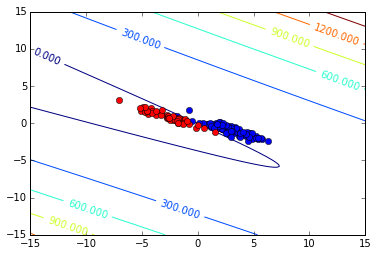

In [19]:
# Train QDA model on the trainC dataset
A,B,alpha = qda_train(class1, class2, p1)

Z0 = A[0,0]*(X0**2) + (A[1,0]+A[0,1])*X0*Y0 + A[1,1]*(Y0**2) + B[0]*X0 + B[1]*Y0 + alpha
plt.plot(class1[:,0],class1[:,1],'bo',class2[:,0],class2[:,1],'ro')
cs = plt.contour(X0,Y0,Z0)
plt.clabel(cs)

In [20]:
Y_c_pred = ((class1.dot(A)*class1).sum(1) + class1.dot(B) + alpha >= 0)